In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/diabetes_data_engineered.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diabetesMed,readmitted,service_utilization,numchange,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
0,149190,55629189,Caucasian,0,2,1,1,7,3,59,...,1,0,0,1,0.0,20.0,4.0,14.0,0.0,20.0
1,64410,86047875,AfricanAmerican,0,3,1,1,7,2,11,...,1,0,3,0,0.0,0.0,4.0,14.0,0.0,0.0
2,500364,82442376,Caucasian,1,4,1,1,7,2,44,...,1,0,0,1,0.0,0.0,4.0,14.0,1.0,2.0
3,16680,42519267,Caucasian,1,5,1,1,7,1,51,...,1,0,0,0,8.0,19.0,8.0,19.0,4.0,14.0
4,35754,82637451,Caucasian,1,6,1,1,1,3,31,...,1,0,0,0,1.0,2.0,1.0,2.0,4.0,14.0


In [2]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'service_utilization', 'numchange', 'level1_diag1', 'level2_diag1',
       'level1_diag2', 'level2_diag2', 'level1_diag3', 'level2_diag3'],
      dtype='object')

In [3]:
df['age'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10,  1])

In [4]:
df['age'] = df['age'].astype('int64')
df['age'].dtype
print(df['age'].value_counts())
age_dict = {1: 5, 2: 15, 3: 25, 4: 35, 5: 45, 6: 55, 7: 65, 8: 75, 9: 85, 10: 95}
df['age'] = df.age.map(age_dict)
print(df['age'].value_counts())


age
8     17331
7     15228
6     11903
9     10931
5      6494
4      2519
10     1750
3      1004
2       357
1        63
Name: count, dtype: int64
age
75    17331
65    15228
55    11903
85    10931
45     6494
35     2519
95     1750
25     1004
15      357
5        63
Name: count, dtype: int64


In [5]:
print(df.dtypes)

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                        int64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum               float64
A1Cresult                   float64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                   

In [6]:
i = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'level1_diag1', 'level2_diag1',
        'level1_diag2', 'level2_diag2', 'level1_diag3', 'level2_diag3', 'change']

df[i] = df[i].astype('object')
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [7]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
        'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone',
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

df['nummed'] = 0

for col in keys:
    df['nummed'] = df["nummed"] + df[col]

df['nummed'].value_counts()


nummed
1    29975
0    16267
2    14865
3     5444
4      976
5       49
6        4
Name: count, dtype: int64

In [8]:
group_stats = df.groupby('nummed')['readmitted'].agg(['mean', 'count', 'std']).reset_index()
print(group_stats)
df = df[~((df['nummed'] == 5) | (df['nummed'] == 6))]
group_stats = df.groupby('nummed')['readmitted'].agg(['mean', 'count', 'std']).reset_index()
print(group_stats)


   nummed      mean  count       std
0       0  0.076166  16267  0.265272
1       1  0.098616  29975  0.298150
2       2  0.091490  14865  0.288314
3       3  0.090558   5444  0.287006
4       4  0.080943    976  0.272887
5       5  0.000000     49  0.000000
6       6  0.500000      4  0.577350
   nummed      mean  count       std
0       0  0.076166  16267  0.265272
1       1  0.098616  29975  0.298150
2       2  0.091490  14865  0.288314
3       3  0.090558   5444  0.287006
4       4  0.080943    976  0.272887


Text(0.5, 1.0, 'Count plot of nummed vs readmitted')

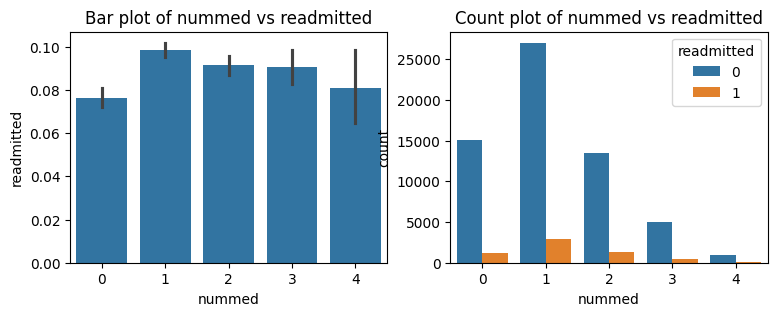

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize = (9, 3))
axes = axes.flatten()

sns.barplot(data = df, y = 'readmitted', x = 'nummed', ax = axes[0]).set_title('Bar plot of nummed vs readmitted')
sns.countplot(data = df, x = 'nummed', hue = 'readmitted', ax = axes[1]).set_title('Count plot of nummed vs readmitted')

In [10]:
num_cols = list(set(list(df._get_numeric_data().columns)) - {'readmitted'})
num_cols

['diabetesMed',
 'time_in_hospital',
 'number_inpatient',
 'number_diagnoses',
 'num_medications',
 'service_utilization',
 'numchange',
 'num_lab_procedures',
 'number_outpatient',
 'number_emergency',
 'num_procedures']

In [11]:
statDataFrame = pd.DataFrame()
statDataFrame['numeric_columns'] = num_cols
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_cols:
    skewVal = df[i].skew()
    skew_before.append(skewVal)

    kurtVal = df[i].kurt()
    kurt_before.append(kurtVal)
    
    sdVal = df[i].std()
    standard_deviation_before.append(sdVal)

    if(abs(skewVal) > 2) & (abs(kurtVal) > 2):
        log_transform_needed.append('Yes')

        if len(df[df[i] == 0])/len(df[i]) <= 0.02:
            log_type.append('log')
            skewValNew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewValNew)
            
            kurtValNew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtValNew)
            
            stdValNew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(stdValNew)
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
    else:
        log_type.append('NA')
        log_transform_needed.append('No')

        skew_after.append(skewVal)
        kurt_after.append(kurtVal)
        standard_deviation_after.append(sdVal)

statDataFrame['skew_before'] = skew_before
statDataFrame['kurtosis_before'] = kurt_before
statDataFrame['standard_deviation_before'] = standard_deviation_before
statDataFrame['log_transform_needed'] = log_transform_needed
statDataFrame['log_type'] = log_type
statDataFrame['skew_after'] = skew_after
statDataFrame['kurtosis_after'] = kurt_after
statDataFrame['standard_deviation_after'] = standard_deviation_after

statDataFrame



,numeric_columns,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,diabetesMed,-1.211847,-0.531443,0.427631,No,NA,-1.211847,-0.531443,0.427631
1,time_in_hospital,1.162020,0.953860,2.947319,No,NA,1.162020,0.953860,2.947319
2,number_inpatient,5.425972,44.438300,0.612715,Yes,log1p,3.044309,9.564568,0.301744
3,number_diagnoses,-0.663356,-0.630744,1.890894,No,NA,-0.663356,-0.630744,1.890894
4,num_medications,1.441329,3.892899,8.258424,No,NA,1.441329,3.892899,8.258424
5,service_utilization,6.608949,95.729499,1.450366,Yes,log1p,1.866510,3.085486,0.509657
6,numchange,1.602154,2.051897,0.475816,No,NA,1.602154,2.051897,0.475816
7,num_lab_procedures,-0.218053,-0.301975,19.951989,No,NA,-0.218053,-0.301975,19.951989
8,number_outpatient,9.574868,179.932856,1.080728,Yes,log1p,3.109845,10.337303,0.384145
9,number_emergency,21.030885,1183.598727,0.519109,Yes,log1p,4.198307,20.792006,0.232183


In [12]:
for i in range(len(statDataFrame)):
    colname = statDataFrame['numeric_columns'][i]
    log_type = statDataFrame['log_type'][i]
    
    if log_type == 'log':
        df[colname + '_log'] = np.log(df[df[colname] > 0][colname])
        
    elif log_type == 'log1p':
        df[colname + '_log1p'] = np.log1p(df[colname])

In [13]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [14]:
df.shape

(67527, 54)

In [15]:
numerics = list(set(list(df._get_numeric_data().columns)) - {'readmitted'})
numerics

['diabetesMed',
 'number_inpatient_log1p',
 'number_emergency_log1p',
 'time_in_hospital',
 'service_utilization_log1p',
 'number_diagnoses',
 'num_medications',
 'num_lab_procedures',
 'number_outpatient_log1p',
 'numchange',
 'num_procedures']

In [16]:
df['diabetesMed'].unique()

array([1, 0])

In [17]:
df['repaglinide'].unique()

array([0, 1], dtype=object)

In [18]:
df['encounter_id'] = df['encounter_id'].astype('int64')
df['patient_nbr'] = df['patient_nbr'].astype('int64')
df['diabetesMed'] = df['diabetesMed'].astype('int64')
df['change'] = df['change'].astype('int64')

i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol',
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']

df[i] = df[i].astype('int64')
df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                           object
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                      int64
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
acetohexamide                  int64
glipizide                      int64
glyburide                      int64
tolbutamide                    int64
p

In [19]:
dfcopy = df.copy(deep = True)

In [20]:
df['readmitted'].unique()

array([0, 1])

In [21]:
df.drop(['level2_diag1', 'level1_diag2',
       'level2_diag2', 'level1_diag3', 'level2_diag3',
       'diag_1', 'diag_2', 'diag_3'
       ], axis = 1, inplace = True)

In [22]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'numchange', 'level1_diag1', 'nummed', 'number_inpatient_log1p',
       'service_utilization_log1p', 'number_outpatient_log1p',
       'number_emergency_log1p'],
      dtype='object')

In [23]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [24]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'numchange', 'level1_diag1', 'nummed', 'number_inpatient_log1p',
       'service_utilization_log1p', 'number_outpatient_log1p',
       'number_emergency_log1p', 'num_medications|time_in_hospital',
       'num_medications|num_procedures', 'time_in_hospital|num_lab_proc

In [25]:
df[['number_diagnoses', 'time_in_hospital', 'number_diagnoses|time_in_hospital']].head()

,number_diagnoses,time_in_hospital,number_diagnoses|time_in_hospital
0,9,3,27
1,6,2,12
2,7,2,14
3,5,1,5
4,9,3,27


In [26]:
datf = pd.DataFrame()
datf['features'] = numerics
datf['std'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())
datf

,features,std,mean
0,diabetesMed,0.427631,0.759104
1,number_inpatient_log1p,0.301744,0.105592
2,number_emergency_log1p,0.232183,0.062212
3,time_in_hospital,2.947319,4.310054
4,service_utilization_log1p,0.509657,0.276188
5,number_diagnoses,1.890894,7.332711
6,num_medications,8.258424,15.764613
7,num_lab_procedures,19.951989,42.959024
8,number_outpatient_log1p,0.384145,0.137056
9,numchange,0.475816,0.261851


In [27]:
df2 = df.drop_duplicates(subset = ['patient_nbr'], keep = 'first')
df2.shape

(67527, 55)

In [28]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [29]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis = 1)]

In [30]:
df2.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_emergency_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
0,149190,55629189,Caucasian,0,15,1,1,7,-0.444493,0.803985,...,-0.267945,54,0,177,1062,162,135,18,27,18
1,64410,86047875,AfricanAmerican,0,25,1,1,7,-0.783787,-1.601808,...,-0.267945,26,65,22,143,78,150,0,12,0
2,500364,82442376,Caucasian,1,35,1,1,7,-0.783787,0.052174,...,-0.267945,32,16,88,704,112,245,16,14,16
3,16680,42519267,Caucasian,1,45,1,1,7,-1.123081,0.403019,...,-0.267945,8,0,51,408,40,225,8,5,0
4,35754,82637451,Caucasian,1,55,1,1,1,-0.444493,-0.599394,...,-0.267945,48,96,93,496,144,495,0,27,0


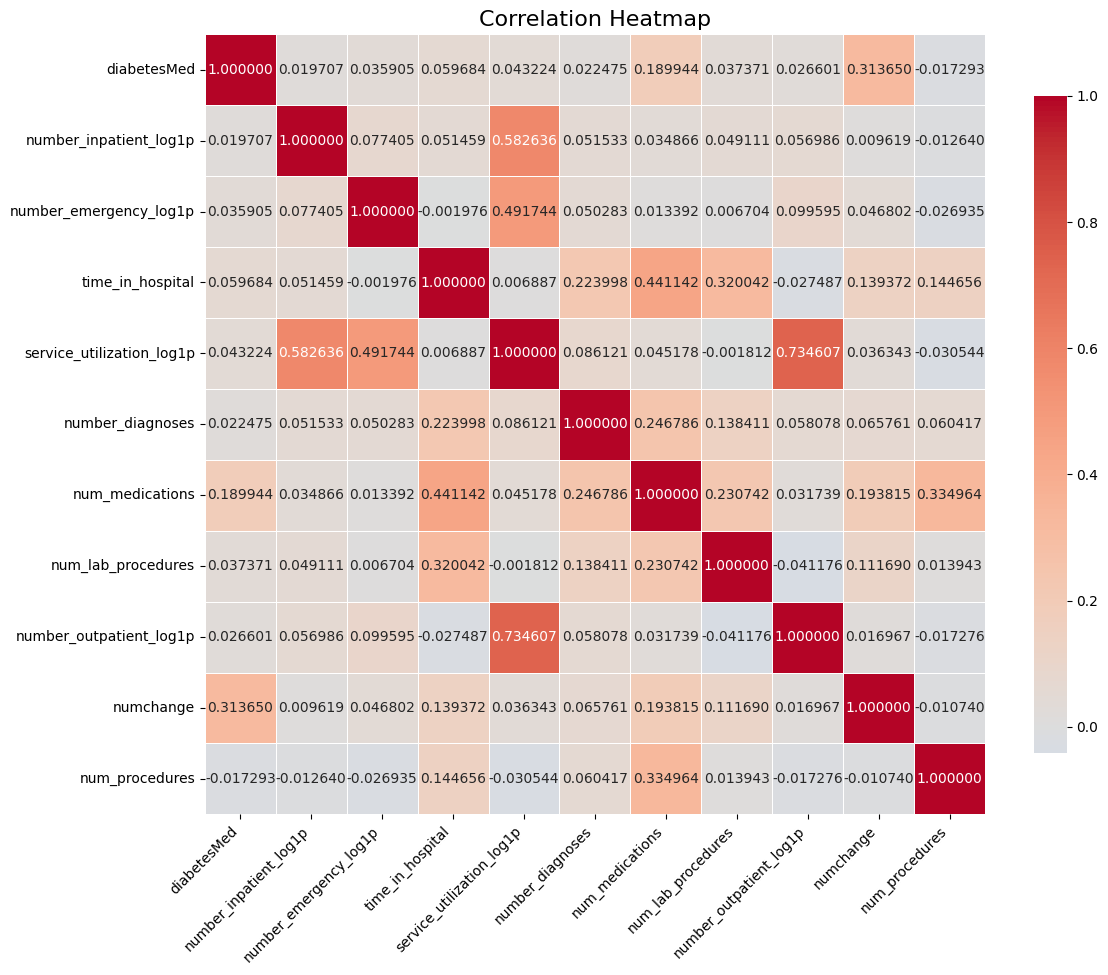

In [31]:
corr_matrix = df2[numerics].corr(method='pearson')

plt.figure(figsize = (12, 10))
sns.heatmap(corr_matrix, annot = True, fmt = "0f", cmap = 'coolwarm', center = 0, square = True,
linewidths = 0.5, cbar_kws = {"shrink":0.8})
plt.title("Correlation Heatmap", fontsize = 16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
from matplotlib.colors import ListedColormap

palette = sns.light_palette((250, 100, 50), input="husl", n_colors=50)
my_cmap = ListedColormap(palette.as_hex())

table = df2.drop(['patient_nbr', 'encounter_id'], axis=1)._get_numeric_data().corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis=None)


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,number_inpatient_log1p,service_utilization_log1p,number_outpatient_log1p,number_emergency_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
time_in_hospital,1.000000,0.320042,0.144656,0.441142,0.223998,0.073924,-0.012958,0.031005,0.006799,0.001173,0.008391,nan,0.013011,0.024315,0.005068,-0.004786,-0.001490,-0.001155,-0.002229,0.005701,-0.006655,0.097227,-0.000181,0.002338,nan,nan,0.002796,0.094174,0.059684,0.055235,0.139372,0.051459,0.006887,-0.027487,-0.001976,0.859381,0.270812,0.852982,0.502060,0.456242,0.230919,0.938942,0.229545
num_lab_procedures,0.320042,1.000000,0.013943,0.230742,0.138411,0.275738,-0.051268,0.005067,-0.008266,-0.002338,-0.009309,nan,0.015958,0.002347,0.000598,-0.018019,-0.009272,-0.004349,-0.004170,0.005203,-0.001003,0.100037,-0.014797,-0.003790,nan,nan,-0.003981,0.064368,0.037371,0.025641,0.111690,0.049111,-0.001812,-0.041176,0.006704,0.328677,0.114756,0.674554,0.732821,0.258798,0.134971,0.322220,0.155630
num_procedures,0.144656,0.013943,1.000000,0.334964,0.060417,-0.029547,-0.057212,0.003881,-0.005837,0.005285,0.005022,nan,0.004692,0.003112,0.000055,0.012781,0.008279,-0.000147,-0.001172,-0.005738,-0.000292,0.002533,-0.008900,-0.003376,nan,nan,-0.000936,-0.016091,-0.017293,0.002069,-0.010740,-0.012640,-0.030544,-0.017276,-0.026935,0.263935,0.877754,0.138848,0.244514,0.292483,0.109674,0.153369,0.075306
num_medications,0.441142,0.230742,0.334964,1.000000,0.246786,0.017527,0.078640,0.024489,0.029355,0.002110,0.043093,nan,0.054742,0.042690,0.005087,0.074304,0.057999,0.011909,0.002426,0.004258,-0.001551,0.194148,0.008786,0.004268,nan,nan,0.002840,0.233035,0.189944,0.038864,0.193815,0.034866,0.045178,0.031739,0.013392,0.752695,0.599392,0.439795,0.772148,0.898579,0.530562,0.459657,0.392578
number_diagnoses,0.223998,0.138411,0.060417,0.246786,1.000000,0.002817,-0.072367,0.031141,0.014175,-0.015601,0.012157,nan,-0.012883,-0.024166,0.000013,0.004078,-0.006989,0.005713,-0.002210,0.005224,-0.010421,0.090374,-0.002039,0.001744,nan,nan,-0.007026,0.042291,0.022475,0.039611,0.065761,0.051533,0.086121,0.058078,0.050283,0.244074,0.111076,0.219066,0.250626,0.599196,0.123675,0.484349,0.120069
A1Cresult,0.073924,0.275738,-0.029547,0.017527,0.002817,1.000000,0.037361,0.016523,0.000944,-0.001977,0.018175,nan,0.007426,0.003546,-0.001881,-0.003615,0.004312,-0.001602,-0.001881,-0.003314,-0.001721,0.097634,-0.003263,0.003031,nan,nan,-0.001913,0.093422,0.072255,-0.005161,0.111177,-0.044217,-0.051019,-0.032723,-0.011760,0.062391,0.001621,0.179458,0.178389,0.027899,0.077915,0.061294,0.099010
metformin,-0.012958,-0.051268,-0.057212,0.078640,-0.072367,0.037361,1.000000,0.002612,0.014708,-0.011702,0.038903,nan,0.072523,0.136562,-0.008108,0.050552,0.092836,0.003501,0.010148,-0.003626,-0.001159,-0.025624,-0.027225,-0.001721,nan,nan,0.008006,0.352446,0.296896,-0.009906,0.018742,-0.018672,0.008564,0.026661,-0.002184,0.017453,-0.012359,-0.036338,0.007301,0.028840,0.299731,-0.034696,0.025280
repaglinide,0.031005,0.005067,0.003881,0.024489,0.031141,0.016523,0.002612,1.000000,0.001272,-0.003680,-0.010355,nan,-0.021675,-0.023575,-0.001781,0.013326,0.016280,0.022198,0.026819,-0.000796,-0.002389,0.008153,-0.005839,-0.001216,nan,nan,-0.000460,0.075601,0.065201,0.015647,0.031144,0.010607,0.009943,0.000816,0.009409,0.030917,0.008700,0.024954,0.021099,0.034316,0.068179,0.039515,0.030887
nateglinide,0.006799,-0.008266,-0.0058

In [33]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns = ['gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
'max_glu_serum', 'A1Cresult', 'level1_diag1', 'race'], drop_first = True)
df.shape

(67527, 55)

In [34]:
df_pd.shape

(59669, 80)

In [35]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [36]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['number_emergency_log1p',
 'change|num_medications',
 'number_diagnoses',
 'metformin',
 'troglitazone',
 'num_medications',
 'glipizide-metformin',
 'num_lab_procedures',
 'number_outpatient_log1p',
 'glyburide-metformin',
 'chlorpropamide',
 'repaglinide',
 'encounter_id',
 'time_in_hospital|num_lab_procedures',
 'acarbose',
 'num_procedures',
 'metformin-pioglitazone',
 'num_medications|time_in_hospital',
 'service_utilization_log1p',
 'insulin',
 'metformin-rosiglitazone',
 'pioglitazone',
 'number_inpatient_log1p',
 'glimepiride',
 'glipizide',
 'glyburide',
 'A1Cresult',
 'num_medications|num_procedures',
 'number_diagnoses|time_in_hospital',
 'tolbutamide',
 'tolazamide',
 'glimepiride-pioglitazone',
 'diabetesMed',
 'time_in_hospital',
 'num_medications|numchange',
 'num_medications|num_lab_procedures',
 'nateglinide',
 'num_medications|number_diagnoses',
 'rosiglitazone',
 'miglitol',
 'acetohexamide',
 'patient_nbr',
 'numchange']

In [37]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

new_non_num_cols

['race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_0.0',
 'max_glu_serum_1.0',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [38]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [39]:
df_pd.head().T

,0,1,2,3,4
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
age,15,25,35,45,55
time_in_hospital,-0.444493,-0.783787,-0.783787,-1.123081,-0.444493
num_lab_procedures,0.803985,-1.601808,0.052174,0.403019,-0.599394
...,...,...,...,...,...
level1_diag1_8.0,False,False,False,True,False
race_Asian,False,False,False,False,False
race_Caucasian,True,False,True,True,True
race_Hispanic,False,False,False,False,False


In [40]:
df_pd.shape

(59669, 80)

In [41]:
df_pd.to_csv('data/diabetes_data_preprocessed.csv', index = False)